# Ejercicion de programación - Regresión Logistica

En este ejercicio se implementa regresion logistica y se aplica a un dataset, que trata sobre fraude bancario.


Aquí se importan librerías necesarias para el trabajo: os para manejar rutas, numpy para cálculos matemáticos y vectoriales, matplotlib.pyplot para graficar, scipy.optimize para funciones de optimización, pandas para trabajar con tablas de datos, y train_test_split de sklearn para dividir datos en entrenamiento y prueba. Además, %matplotlib inline indica que los gráficos se mostrarán dentro del cuadernillo.

In [68]:
# se utiliza para el manejo de rutas y directorios.
#Estudiante: Valda Plaza Camila Monserrat.
#Carrera: Ing. Sistemas.

import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

import pandas as pd
from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## 1 Regresion Logistica

En esta parte del ejercicio, se construirá un modelo de regresión logística para predecir si una transacción financiera es fraude o no. Usted es analista de seguridad en un banco y necesita identificar operaciones sospechosas basándose en información histórica de transacciones. El dataset contiene datos de 20,000 operaciones registradas, donde cada fila representa una transacción con sus características y una etiqueta que indica si fue fraude (is_fraud = 1) o no (is_fraud = 0). Para este ejercicio se emplean como variables principales el monto de la transacción y el número de transacciones anteriores del cliente. Su tarea es entrenar un modelo de clasificación que calcule la probabilidad de que una nueva transacción sea fraudulenta en función de estos datos.

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se carga el dataset desde Drive con pandas.read_csv(), se imprime su tamaño (filas y columnas), y se seleccionan las variables relevantes: y (columna is_fraud) como la variable objetivo y X (transaction_amount, previous_transactions_count) como características. Se manejan posibles valores nulos rellenando con la media (para numéricos) o moda (para categóricos). Finalmente, se dividen los datos en entrenamiento y prueba (80%-20%) usando train_test_split.

In [70]:
df = pd.read_csv('/content/drive/MyDrive/Laboratorio 3 - VALDA PLAZA CAMILA MONSERRAT - IA/fraud_detection_20k.csv', delimiter=',')

print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")
y = df['is_fraud']
X = df[['transaction_amount', 'previous_transactions_count']].copy()

print("\nColumnas seleccionadas como características (X):", X.columns.tolist())

print("Valores nulos antes del manejo:")
print(X.isnull().sum())

# Rellenar valores nulos con la media de la columna (solo para columnas numéricas)
for col in X.columns:
    if X[col].dtype in ['int64', 'float64']:
        X[col] = X[col].fillna(X[col].mean())
    else:
        # Para columnas no numéricas, se puede considerar rellenar con la moda o una categoría específica
        X[col] = X[col].fillna(X[col].mode()[0])


print("\nValores nulos después del manejo:")
print(X.isnull().sum())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nForma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

display(df)

El dataset tiene 20000 filas y 9 columnas.

Columnas seleccionadas como características (X): ['transaction_amount', 'previous_transactions_count']
Valores nulos antes del manejo:
transaction_amount             0
previous_transactions_count    0
dtype: int64

Valores nulos después del manejo:
transaction_amount             0
previous_transactions_count    0
dtype: int64

Forma de X_train: (16000, 2)
Forma de X_test: (4000, 2)
Forma de y_train: (16000,)
Forma de y_test: (4000,)


,transaction_id,customer_id,transaction_amount,transaction_type,transaction_time,transaction_location,device_type,previous_transactions_count,is_fraud
0,T000000,C2757,46.93,transfer,2025-01-24 01:36:10,Illinois,mobile,46,0
1,T000001,C2921,301.01,transfer,2025-01-25 20:23:15,Texas,ATM,48,0
2,T000002,C1412,131.67,deposit,2025-01-18 03:31:58,Washington,desktop,43,0
3,T000003,C2653,91.29,payment,2025-01-08 01:58:43,New York,desktop,40,0
4,T000004,C8219,16.96,payment,2025-01-13 16:58:09,Washington,mobile,0,0
...,...,...,...,...,...,...,...,...,...
19995,T019995,C8892,209.59,payment,2025-01-07 20:53:47,Texas,ATM,38,0
19996,T019996,C4305,4.79,payment,2025-01-26 00:50:42,Illinois,POS,37,0
19997,T019997,C6526,36.20,deposit,2025-01-17 15:58:45,Florida,ATM,15,0
19998,T019998,C3686,58.58,withdrawal,2025-01-09 02:52:00,Georgia,POS,14,0


### 1.1 Visualizar los datos

Se define una función para visualizar los datos. Se crean dos grupos: positivos (fraudes) y negativos (no fraudes). Luego, con pyplot.plot(), se grafican los puntos en un plano 2D usando distintos marcadores (o amarillo para no fraude y * negro para fraude). Se agrega una leyenda para diferenciar clases

In [71]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.
    fig = pyplot.figure()

    pos = y == 1
    neg = y == 0

    pyplot.plot(X.loc[neg, X.columns[0]], X.loc[neg, X.columns[1]], 'ko', mfc='y', ms=8, mec='k', mew=1, label='No Fraude')
    pyplot.plot(X.loc[pos, X.columns[0]], X.loc[pos, X.columns[1]], 'k*', lw=1, ms=15, mec='y', label='Fraude')

    pyplot.legend()

Se llama a plotData(X, y) para graficar todo el dataset. Además, se añaden etiquetas a los ejes (Cantidad de Transacción, Número de Transacciones Anteriores) y una leyenda para interpretar el gráfico.
 Se llama a la función implementada para mostrar los datos cargados:

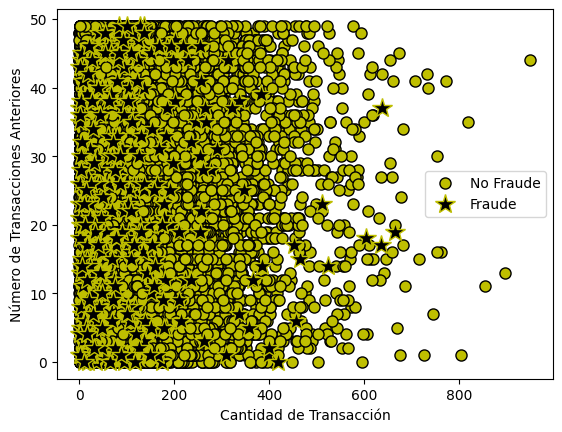

In [72]:
plotData(X, y)

# adiciona etiquetas para los ejes
pyplot.xlabel('Cantidad de Transacción')
pyplot.ylabel('Número de Transacciones Anteriores')
pyplot.legend(['No Fraude', 'Fraude'])
pass


Se vuelve a graficar, pero esta vez solo con los datos de entrenamiento (X_train, y_train). Esto permite observar cómo están distribuidos los ejemplos que se usarán para entrenar el modelo de regresión logística.

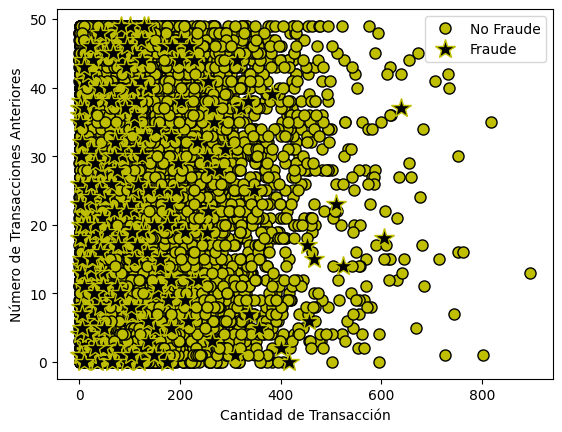

In [73]:
plotData(X_train, y_train) #se hace lo mismo pero con la práctica de las variables entrenadas

# adiciona etiquetas para los ejes
pyplot.xlabel('Cantidad de Transacción')
pyplot.ylabel('Número de Transacciones Anteriores')
pyplot.legend(['No Fraude', 'Fraude'])
pass

<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

En esta celda se implementa la función calcularSigmoide(z), que aplica la fórmula matemática de la sigmoide. Esta función transforma cualquier valor real en un número entre 0 y 1, lo que permite interpretarlo como probabilidad. La función recibe como entrada un escalar, vector o matriz y devuelve el resultado correspondiente.

In [74]:
def calcularSigmoide(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Aquí se valida el correcto funcionamiento de la sigmoide utilizando valores de prueba [-10, 10, 0]. El resultado muestra valores cercanos a 0 para entradas negativas grandes, cercanos a 1 para entradas positivas grandes y exactamente 0.5 cuando la entrada es 0, confirmando el comportamiento esperado.

In [75]:
# Prueba la implementacion de la funcion sigmoid
z = [-10, 10, 0] # Valores de prueba modificados para evitar desbordamiento
g = calcularSigmoide(z)

print('g(', z, ') = ', g)

g( [-10, 10, 0] ) =  [4.53978687e-05 9.99954602e-01 5.00000000e-01]


<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

En esta parte se obtiene la dimensión de la matriz de características X mediante X.shape y se imprime su contenido. Todavía no se agrega la columna de intercepto, pero esta inspección permite confirmar que los datos de entrada están estructurados correctamente.

In [76]:
# Configurar la matriz adecuadamente, manteniendo las caracteristicas originales sin el termino de intercepcion
m, n = X.shape

print(X[:])

       transaction_amount  previous_transactions_count
0                   46.93                           46
1                  301.01                           48
2                  131.67                           43
3                   91.29                           40
4                   16.96                            0
...                   ...                          ...
19995              209.59                           38
19996                4.79                           37
19997               36.20                           15
19998               58.58                           14
19999               18.91                           40

[20000 rows x 2 columns]


Se define la función calcularCosto(theta, X, y), que implementa la función de costo de la regresión logística. Esta calcula el error promedio entre las predicciones del modelo y los valores reales de y. Se utiliza la hipótesis logística hθ(x) y se aplica la fórmula estándar de costo para medir la calidad del ajuste.

In [77]:
def calcularCosto(theta, X, y):
    m = y.size

    J = 0
    h = calcularSigmoide(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

En esta celda se implementa la función descensoGradiente(), que ajusta los parámetros del modelo (theta) de manera iterativa. En cada iteración, el algoritmo actualiza theta siguiendo la dirección del gradiente de la función de costo, con una tasa de aprendizaje alpha. También se guarda el historial de costos para analizar la convergencia del modelo.

In [78]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = calcularSigmoide(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

Aquí se normalizan las características de X para mejorar la estabilidad numérica y luego se añade la columna de intercepto. Posteriormente, se inicializan los parámetros theta en cero y se ejecuta el descenso por gradiente con una tasa de aprendizaje de 0.1 y 10,000 iteraciones. Finalmente, se grafica la evolución de la función de costo y se imprimen los valores finales de los parámetros obtenidos

theta calculado por el descenso por el gradiente: [-4.18564105  0.09494035 -0.14301586]


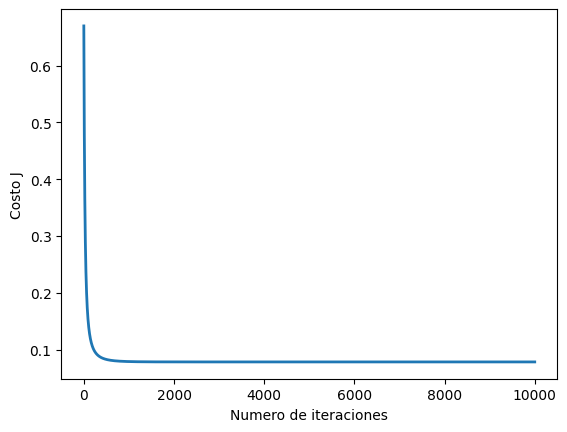

In [61]:
alpha = 0.1
num_iters = 10000

# Normalizar las caracteristicas de X para evitar desbordamientos
# m es el número de ejemplos de entrenamiento, que se obtiene del tamaño de y.
m = y.shape[0]
X_normalized = (X - X.mean()) / X.std()
# Agregar la columna de unos para el termino de intercepcion a la matriz normalizada
X_normalized = np.concatenate([np.ones((m, 1)), X_normalized], axis=1)


# inicializa theta y ejecuta el descenso por el gradiente
# Theta debe tener la dimensión correcta (número de columnas en X_normalized)
theta = np.zeros(X_normalized.shape[1])
theta, J_history = descensoGradiente(theta, X_normalized, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

En esta parte se repite el proceso anterior, pero utilizando únicamente los datos de entrenamiento (X_train, y_train). Esto permite entrenar el modelo de manera más realista, reservando los datos de prueba para evaluar su desempeño posteriormente. Al final, se visualiza la convergencia del costo y los parámetros calculados.

theta calculado por el descenso por el gradiente: [-4.1720956   0.07946936 -0.1390694 ]


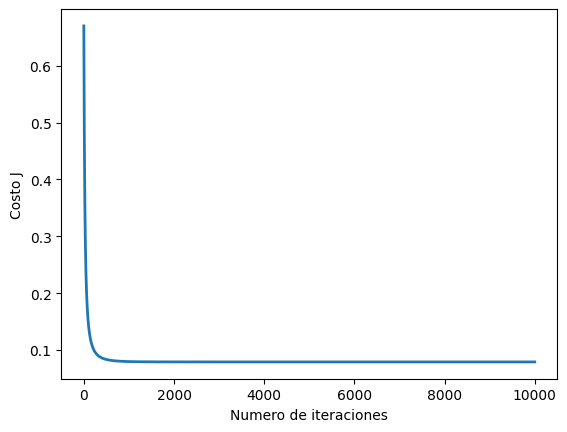

In [62]:
alpha = 0.1
num_iters = 10000

# Normalizar las caracteristicas de X_train para evitar desbordamientos
# m es el número de ejemplos de entrenamiento, que se obtiene del tamaño de y_train.
m = y_train.shape[0]
X_train_normalized = (X_train - X_train.mean()) / X_train.std()
# Agregar la columna de unos para el termino de intercepcion a la matriz normalizada
X_train_normalized = np.concatenate([np.ones((m, 1)), X_train_normalized], axis=1)


# inicializa theta y ejecuta el descenso por el gradiente
# theta debe tener la dimensión correcta (número de columnas en X_train_normalized)
theta = np.zeros(X_train_normalized.shape[1])
theta, J_history = descensoGradiente(theta, X_train_normalized, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Los datos de prueba (X_test, y_test) se usarían después para evaluar el rendimiento del modelo entrenado.
# Por ejemplo, calculando la precisión en el conjunto de prueba.

Se imprime el último valor de la función de costo (J_history[-1]), lo que refleja el error final alcanzado por el modelo después de todas las iteraciones. Un valor bajo indica que el modelo logró un buen ajuste a los datos de entrenamiento.

In [63]:
print(J_history[-1])

0.07924831408044147


Aquí se construye un vector de entrada con los valores [50, 60], correspondientes a la cantidad de transacción y al número de transacciones anteriores. Se normalizan estas características con la media y desviación estándar del dataset, se añade el intercepto y se calcula la probabilidad de fraude aplicando la función sigmoide al producto X·θ. El resultado muestra una probabilidad cercana a 0.01, indicando que es poco probable que este caso sea un fraude.

In [64]:
# agregar el término de intercepción.
X_array_original = np.array([50, 60])

# Normalizar las caracteristicas originales usando la media y std de X
X_array_normalized_features = (X_array_original - X.mean()) / X.std()

# Agregar el término de intercepción a las caracteristicas normalizado
X_array_final = np.concatenate([[1], X_array_normalized_features])

probabilidad_enfermedad = calcularSigmoide(np.dot(X_array_final, theta))

print(f"Una transacción con Cantidad de Transacción: {X_array_original[0]} y Número de Transacciones Anteriores: {X_array_original[1]} tiene una probabilidad de ser fraude (usando el descenso por el gradiente): {probabilidad_enfermedad}")

Una transacción con Cantidad de Transacción: 50 y Número de Transacciones Anteriores: 60 tiene una probabilidad de ser fraude (usando el descenso por el gradiente): 0.010414597405106762


En esta celda se imprime la forma de X (20000, 2), confirmando que el dataset contiene 20,000 filas y 2 columnas, lo cual valida que el preprocesamiento de las variables se realizó de manera correcta.

In [65]:
print(X.shape)

(20000, 2)


Se repite el procedimiento de predicción, pero con un nuevo ejemplo de características [100, 5]. Tras normalizar y agregar el intercepto, se calcula la probabilidad de fraude, que resulta cercana a 0.018. Este valor, al igual que en el caso anterior, es bajo, lo que indica que el modelo predice baja probabilidad de fraude para esta transacción.

In [66]:
# y luego agregar el término de intercepción.
X_array_original = np.array([100, 5]) # Array con las caracteristicas originales (Cantidad de Transacción, Número de Transacciones Anteriores)

# Normalizar las caracteristicas originales usando la media y std de X
X_array_normalized_features = (X_array_original - X.mean()) / X.std()

# Se agrega el término de intercepción a las caracteristicas normalizadas
# Esto resulta en un array de 3 elementos: [1, Cantidad de Transacción normalizada, Número de Transacciones Anteriores normalizado]
X_array_final = np.concatenate([[1], X_array_normalized_features])

probabilidad_fraude = calcularSigmoide(np.dot(X_array_final, theta))

print(f"Una transacción con Cantidad de Transacción: {X_array_original[0]} y Número de Transacciones Anteriores: {X_array_original[1]} tiene una probabilidad de ser fraude (usando el descenso por el gradiente): {probabilidad_fraude}")

Una transacción con Cantidad de Transacción: 100 y Número de Transacciones Anteriores: 5 tiene una probabilidad de ser fraude (usando el descenso por el gradiente): 0.01829651267735746


En esta celda se evalúa el rendimiento del modelo utilizando el conjunto de prueba (20% de los datos separados previamente). Para ello, se normalizan las características de prueba con la misma media y desviación estándar calculadas en el conjunto de entrenamiento, asegurando coherencia en la escala. Luego, el modelo entrenado aplica los parámetros obtenidos (θ) para generar predicciones, que se comparan con las etiquetas reales del conjunto de validación. Finalmente, se calcula la precisión, es decir, el porcentaje de aciertos del modelo al clasificar correctamente los ejemplos de prueba.

In [67]:
# Normalizar el conjunto de prueba con la media y desviación de entrenamiento
X_test_normalized = (X_test - X_train.mean()) / X_train.std()
X_test_normalized = np.concatenate([np.ones((X_test_normalized.shape[0], 1)), X_test_normalized], axis=1)

# Obtener predicciones (0 o 1 según umbral 0.5)
y_pred = (calcularSigmoide(np.dot(X_test_normalized, theta)) >= 0.5).astype(int)

# Calcular precisión
accuracy = np.mean(y_pred == y_test)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy * 100:.2f}%")

Precisión del modelo en el conjunto de prueba: 98.55%
